In [1]:
from sklearn import datasets  # 自带数据集
from sklearn.model_selection import train_test_split, cross_val_score  # 划分数据 交叉验证
from sklearn.neighbors import KNeighborsClassifier  # 一个简单的模型，只有K一个参数，类似K-means
import matplotlib.pyplot as plt

## 1. 读取数据

In [5]:
iris = datasets.load_iris()  # 加载sklearn自带的数据集
X = iris.data  # 这是数据
y = iris.target  # 这是每个数据所对应的标签
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 2. 数据归一化

In [3]:
X= (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
print(X)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

## 3. 按照test=0.3划分数据

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3) 
print(train_y)

[1 0 0 1 2 0 0 1 1 2 0 1 0 2 1 2 0 1 0 1 2 1 0 2 2 1 0 1 0 1 2 1 1 1 0 1 0
 2 0 0 1 2 1 1 2 2 0 2 1 2 2 0 0 1 0 1 2 1 1 2 0 0 2 1 0 0 0 1 1 0 1 2 1 1
 0 2 0 1 0 0 1 2 2 1 0 2 2 0 1 0 0 1 0 2 2 2 1 2 1 1 0 0 0 2 1]


## 3. 交叉验证

In [7]:
# 设置k的取值范围以及训练得分保存的列表
k_range = range(1, 31)
cv_scores = []  

# k次10折交叉验证得分，标准为准确率'accuracy'
# 得分存入得分列表
for n in k_range:
    knn = KNeighborsClassifier(n)  
    scores = cross_val_score(knn, train_X, train_y, cv=10,
                             scoring='accuracy')  
    cv_scores.append(scores.mean())  

In [8]:
print(cv_scores)

[0.9618181818181817, 0.9618181818181817, 0.99, 0.9618181818181817, 0.9709090909090909, 0.9709090909090909, 0.9709090909090909, 0.9709090909090909, 0.9809090909090908, 0.9709090909090909, 0.9809090909090908, 0.9618181818181817, 0.9709090909090909, 0.9627272727272727, 0.9709090909090909, 0.9618181818181817, 0.9618181818181817, 0.9627272727272727, 0.9809090909090908, 0.9718181818181819, 0.9718181818181819, 0.9436363636363637, 0.9627272727272727, 0.9436363636363637, 0.9527272727272728, 0.9436363636363637, 0.9436363636363637, 0.9436363636363637, 0.9436363636363637, 0.9436363636363637]


## 4. 画图

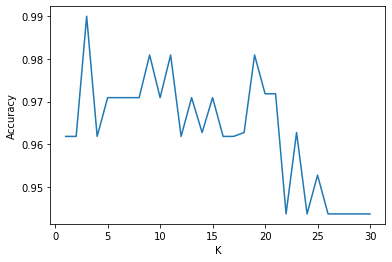

In [9]:
plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')  # 通过图像选择最好的参数
plt.show()

## 5. 测试数据

In [10]:
best_knn = KNeighborsClassifier(n_neighbors=3)  
best_knn.fit(train_X, train_y)  # 训练模型
y_hat = best_knn.predict(test_X)
print(y_hat)
print(test_y)

count = 0
for i in range(len(y_hat)):
    if y_hat[i] == test_y[i]:
        count += 1
print(count/len(y_hat))

[2 0 0 0 2 1 1 2 0 1 2 2 1 0 2 0 1 1 0 2 2 0 1 0 1 0 0 2 1 2 1 1 1 0 1 0 2
 2 2 2 2 2 2 2 2]
[2 0 0 0 2 1 1 2 0 1 2 2 1 0 2 0 1 2 0 2 2 0 1 0 1 0 0 2 1 2 1 2 2 0 1 0 1
 2 2 2 2 2 2 2 2]
0.9111111111111111


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## 1. 读取数据

In [13]:
iris = datasets.load_iris()
data = iris.data
label = iris.target

## 2. 数据归一化

In [14]:
data= (data-data.min(axis=0)) / (data.max(axis=0)-data.min(axis=0))

## 3. 数据集划分

In [15]:
X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.3)
knn_clf = KNeighborsClassifier()

## 4. 网格搜索参数设置

In [17]:
param_grid = [
    {
         'weights':['uniform'],
         'n_neighbors':[i for i in range(1,31)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,31)],
        'p':[i for i in range(1,6)]
    }
]
grid_search = GridSearchCV(knn_clf,param_grid,n_jobs=-1,verbose=2)

### 5. 开始网格搜索

In [18]:
grid_search.fit(X_train,y_train)

c:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    1.6s finished
c:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'p': [1, 

## 6. 搜索结果

In [19]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [20]:
grid_search.best_score_

0.9619047619047619

In [21]:
grid_search.best_params_

{'n_neighbors': 12, 'weights': 'uniform'}

## 7. 测试数据

In [22]:
model = KNeighborsClassifier(n_neighbors=12, weights='uniform')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [26]:
y_hat1 = model.predict(X_test)
print(y_hat1)
print(y_test)

[2 1 1 2 2 1 1 2 1 2 1 1 0 0 1 1 0 2 1 0 1 0 1 0 2 0 2 1 2 0 2 0 2 1 0 1 2
 1 2 2 2 2 1 2 1]
[2 1 1 2 2 1 2 2 1 2 1 1 0 0 1 1 0 2 1 0 1 0 1 0 2 0 2 2 2 0 2 0 2 1 0 1 2
 1 2 2 2 2 2 2 1]


In [27]:
count = 0
for i in range(len(y_hat1)):
    if y_hat1[i] == y_test[i]:
        count += 1
print(count/len(y_hat1))

0.9333333333333333
